In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Concatenate

from sklearn.preprocessing import StandardScaler

### Image Preprocessing

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D
# from transformers import BertModel, BertTokenizer
# import torchvision.models as models
# from torchvision.models import efficientnet

2024-04-20 06:02:22.849519: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 06:02:24.294768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sound = pd.read_csv("../../mnt/disks/songsnap/sound/composite_sound_features.csv")

In [3]:
files_subset = sound["file"]

In [4]:
files_subset

0                        BeiNacht-RioReiser
1        RetratoEmBrancoePreto-ChicoBuarque
2         Disorder-2007Remaster-JoyDivision
3             BonnieAndClyde-VermillionLies
4                   TurningWorld-SteveRoach
                       ...                 
5001                    IRemember-BoyzIIMen
5002                TheOneYouLove-GlennFrey
5003            EvilShower-MattiasIAEklundh
5004    SomedayMyPrinceWillCome-WyntonKelly
5005                      Frenesi-ArtieShaw
Name: file, Length: 5006, dtype: object

# Sound

In [5]:
X_sound = sound.drop(columns=['file'])

In [6]:
X_sound.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_8,chroma_9,chroma_10,chroma_11,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,tempo,zero_crossing_rate
0,-351.895660,150.02414,-6.896572,17.320564,8.653015,-6.022296,-4.941509,-2.495564,-5.366025,-8.467364,...,0.251770,0.351245,0.323889,0.616524,1342.758321,1655.236300,23.326703,2643.675681,123.046875,0.062076
1,-122.255295,142.03952,-23.865470,28.505121,6.099774,7.245765,3.529555,6.286484,-9.854125,1.037538,...,0.364723,0.397166,0.240263,0.158704,1502.738832,1688.527963,24.697898,2887.615872,103.359375,0.068523
2,-141.611540,73.78059,-2.787975,48.519817,21.242504,11.999403,10.670014,1.822963,4.006479,6.173731,...,0.351600,0.296484,0.409283,0.407676,2200.279115,2306.679734,22.115529,4464.106339,86.132812,0.096047
3,-226.129910,125.73469,-27.305002,14.648936,-4.878088,0.201548,-3.111884,-2.809226,-3.699048,5.522824,...,0.354671,0.313764,0.312182,0.428556,1533.933345,1636.605031,24.532904,2849.707768,80.749512,0.073755
4,-369.496220,187.81370,-52.865265,21.819271,7.338284,-3.071241,-0.053154,-8.198157,0.531561,-0.769229,...,0.320116,0.297991,0.547687,0.263554,1137.773556,1174.242922,23.352699,2074.629122,117.453835,0.073367


In [7]:
# Normalize sound features
scaler = StandardScaler()
X_sound = scaler.fit_transform(X_sound)

In [8]:
display(pd.DataFrame(X_sound))

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.610728,1.474817,-0.140132,-0.637198,0.559476,-1.429546,-0.517829,-0.785946,-0.236689,-1.690314,...,-0.915058,-0.271624,-0.246924,1.979931,-1.083053,-1.063760,0.017729,-1.089999,0.090172,-0.825962
1,0.580657,1.232758,-0.873567,0.158836,0.305415,0.053565,0.676364,0.452821,-0.933755,-0.070669,...,-0.014924,0.076144,-0.932749,-1.633799,-0.837349,-0.991840,0.791136,-0.916054,-0.594519,-0.670039
2,0.395946,-0.836555,0.037451,1.583332,1.812199,0.584929,1.682978,-0.176789,1.218997,0.804543,...,-0.119503,-0.686341,0.453395,0.331422,0.233960,0.343556,-0.665421,0.208088,-1.193624,-0.004269
3,-0.410585,0.738467,-1.022232,-0.827344,-0.786942,-0.733842,-0.259900,-0.830190,0.022217,0.693628,...,-0.095027,-0.555480,-0.342933,0.496235,-0.789439,-1.104009,0.698073,-0.943085,-1.380844,-0.543487
4,-1.778684,2.620432,-2.127006,-0.317013,0.428653,-1.099676,0.171299,-1.590335,0.679292,-0.378544,...,-0.370403,-0.674930,1.588460,-0.806186,-1.397876,-2.102853,0.032392,-1.495767,-0.104343,-0.552856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,-0.502015,0.007693,0.112739,1.275545,2.358959,-0.051225,0.635531,-0.437438,-0.211453,-0.894884,...,1.991565,0.562476,-0.012942,-0.627973,-0.527497,-0.206734,0.046977,-0.423382,-0.732774,-0.710279
5002,0.214028,0.031203,-0.596770,1.549352,0.096774,0.167743,0.186102,0.153839,0.097935,0.286053,...,-0.381564,0.133138,-0.674223,0.314295,-0.292401,-0.335432,1.621235,-0.302553,1.097070,-0.293536
5003,0.907738,-1.276588,0.014140,0.903901,-0.220707,0.873806,-0.043152,1.108636,-0.036534,-0.276382,...,2.654034,1.375893,-0.250649,-0.591127,1.274673,0.936445,-0.714462,1.222478,1.097070,1.237796
5004,-1.596352,1.356807,0.179037,-1.167364,0.106432,-0.810070,-1.616196,-0.283394,-0.278122,-0.500375,...,-1.753210,-0.146003,0.732769,-0.508409,-1.074078,-0.692583,0.703741,-1.154549,1.801899,-0.904257


# Album covers

In [10]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    # Performs standardization and normalization
    img_array = preprocess_input(img_array)
    return img_array

In [39]:
X_image_album_cover = []
for index, row in tqdm(files_subset):
   
    
    album_path = os.path.join("covers", title + ".jpg")
    X_image_album_cover.append(preprocess_image(album_path))
    
    
X_image_album_cover = np.array(X_image_album_cover)
    

0
1
2
3
4
5
6
7
8
9


# Spectrograms

In [13]:
X_image_spectogram = []
for file in tqdm(files_subset):    
    spectogram_path = os.path.join("../../mnt/disks/songsnap/spec/"+file+".jpg")
    X_image_spectogram.append(preprocess_image(spectogram_path))
    
    
X_image_spectogram = np.array(X_image_spectogram)
    

100%|██████████| 5006/5006 [00:19<00:00, 252.53it/s]


In [25]:
np.save('../../mnt/disks/songsnap/X_image_spectogram.npy', X_image_spectogram)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


# Lyrics

In [14]:
lyrics = pd.read_csv("../../mnt/disks/songsnap/lyrics_cleaned.csv")

In [15]:
lyrics.head()

,track,artist,lyrics
0,Jealous Kind Of Fella,Garland Green,3 ContributorsJealous Kind of Fella Lyrics[Int...
1,Initials B.B.,Serge Gainsbourg,14 ContributorsInitials B.B. Lyrics[Paroles de...
2,Melody Twist,Lord Melody,1 ContributorJuice (haeY haeY) LyricsHook (Kro...
3,Mi Bomba Sonó,Celia Cruz,"2 ContributorsMi Bomba Sonó LyricsAcó, mi bomb..."
4,Uravu Solla,P. Susheela,0


In [16]:
lyrics['track'] = lyrics['track'].str.replace(r'\s+', '', regex=True)
lyrics['artist'] = lyrics['artist'].str.replace(r'\s+', '', regex=True)
lyrics['file'] = lyrics['track'] + '-' + lyrics['artist']
lyrics.drop(['track', 'artist'], axis=1, inplace=True)
lyrics = lyrics[['file'] + [col for col in lyrics.columns if col != 'file']]


In [17]:
lyrics.head()

,file,lyrics
0,JealousKindOfFella-GarlandGreen,3 ContributorsJealous Kind of Fella Lyrics[Int...
1,InitialsB.B.-SergeGainsbourg,14 ContributorsInitials B.B. Lyrics[Paroles de...
2,MelodyTwist-LordMelody,1 ContributorJuice (haeY haeY) LyricsHook (Kro...
3,MiBombaSonó-CeliaCruz,"2 ContributorsMi Bomba Sonó LyricsAcó, mi bomb..."
4,UravuSolla-P.Susheela,0


In [31]:
X_lyrics = []
for file in tqdm(files_subset):
    lyrics_string = lyrics.loc[lyrics['file'] == file, 'lyrics'].values[0]
    if len(lyrics_string) > 1000:
        lyrics_string = lyrics_string[:1000]
    X_lyrics.append(lyrics_string)

# Convert the list to a NumPy array
X_lyrics_array = np.array(X_lyrics)

100%|██████████| 5006/5006 [00:15<00:00, 314.54it/s]


In [32]:
np.save('../../mnt/disks/songsnap/X_lyrics_array.npy', X_lyrics_array)


In [35]:
num_columns_X_sound = X_sound.shape[1]

In [36]:
num_genres = 3

In [73]:
y_genre = []
y_popularity = []
y_danceability =[]
y_energy = []

In [74]:
for index, row in dataset.iterrows():
    y_popularity.append(row["popularity"])
    y_genre.append((row["genre"]))
    y_danceability.append(row["danceability"])
    y_energy.append(row["energy"])


In [75]:
y_genre = np.array(y_genre)
y_popularity = np.array(y_popularity)
y_danceability = np.array(y_danceability)
y_energy = np.array(y_energy)

In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_genre = label_encoder.fit_transform(y_genre)

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim

# TODO: Add text and image modality models
# SoundModalityModel creates the sound embeddings based on the SLP features
class SoundModalityModel(nn.Module):
    def __init__(self, num_columns_X_sound):
        super(SoundModalityModel, self).__init__()
        self.sound_embedding = nn.Sequential(
            nn.Linear(num_columns_X_sound, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
            nn.ReLU()
        )

    def forward(self, input_sound):
        sound_embedding = self.sound_embedding(input_sound)
        return sound_embedding
    
    
class ImageModalityModel(nn.Module):
    def __init__(self, embedding_size=8):
        super(ImageModalityModel, self).__init__()
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b0')
        
        # Freeze all parameters of EfficientNet
        for param in self.efficientnet.parameters():
            param.requires_grad = False
        
        # Replace the final fully connected layer with a new one
        self.efficientnet._fc = nn.Linear(self.efficientnet._fc.in_features, embedding_size)

    def forward(self, input_image):
        # Forward pass through EfficientNet
        output = self.efficientnet(input_image)
        return output

# TODO: Fix BERT Model {?}

class TextModalityModel(nn.Module):
    def __init__(self, embedding_size=8, freeze_bert=True):
        super(TextModalityModel, self).__init__()
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        # Freeze the BERT weights if freeze_bert is True
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
        # Maps to size 8 embedding
        self.fc = nn.Linear(self.bert.config.hidden_size, embedding_size)

    def forward(self, input_text):
        # Tokenize input_text
        inputs = self.tokenizer(input_text.tolist(), return_tensors="pt", padding=True, truncation=True)
        
        # Forward pass through BERT
        outputs = self.bert(**inputs)
        
        # Extract the last hidden states
        last_hidden_states = outputs.last_hidden_state
        
        # Take the mean of the last hidden states (reduce it to 1 dimension)
        mean_last_hidden_state = torch.mean(last_hidden_states, dim=1)
        
        # Pass the mean last hidden states through the fully connected layer (maps to size 8 embedding)
        output = self.fc(mean_last_hidden_state)
        
        return output

    
# Overall model that combines the embeddings from the three modalities and produces 4 outputs
# Separate fully connected layers for genre, popularity, danceability, and energy
class OverallModel(nn.Module):
    def __init__(self, num_modalities, num_genres):
        super(OverallModel, self).__init__()
        self.concatenated_output_size = 8 * num_modalities
        self.fc1 = nn.Linear(self.concatenated_output_size, 64)
        self.fc2_genre = nn.Linear(64, num_genres)
        self.fc3_popularity = nn.Linear(64, 1)
        self.fc4_danceability = nn.Linear(64, 1)
        self.fc5_energy = nn.Linear(64, 1)

    def forward(self, sound_embedding, album_embedding, spec_embedding, text_embedding):
        # TODO: Concatenate with text and image embeddings
        concatenated_embedding = torch.cat((sound_embedding, album_embedding, spec_embedding, text_embedding), dim=1)
        x = torch.relu(self.fc1(concatenated_embedding))
        genre_output = torch.softmax(self.fc2_genre(x), dim=-1)
        popularity_output = torch.sigmoid(self.fc3_popularity(x))
        danceability_output = torch.sigmoid(self.fc4_danceability(x))
        energy_output = torch.sigmoid(self.fc5_energy(x))
        return genre_output, popularity_output, danceability_output, energy_output

num_modalities = 4 # TODO: Change to 3 once we have text and image modalities
num_genres = 3 

#TODO: Instantiate the remaining modality models
sound_model = SoundModalityModel(num_columns_X_sound)
album_model = ImageModalityModel()
spec_model = ImageModalityModel()
text_model = TextModalityModel()

overall_model = OverallModel(num_modalities, num_genres)

# TODO: Create optimizers for text and image modalities
# Create optimizers for each of our models (modality models as well as genre, popularity, danceability, energy)
optimizer_sound = optim.Adam(sound_model.parameters())
# optimizer_album = optim.Adam(album_model.parameters())
# optimizer_spec = optim.Adam(spec_model.parameters())

optimizer_genre = optim.Adam(overall_model.fc2_genre.parameters())
optimizer_popularity = optim.Adam(overall_model.fc3_popularity.parameters())
optimizer_danceability = optim.Adam(overall_model.fc4_danceability.parameters())
optimizer_energy = optim.Adam(overall_model.fc5_energy.parameters())

# Define the criteria
criterion_genre = nn.CrossEntropyLoss()
criterion_popularity = nn.MSELoss()
criterion_danceability = nn.MSELoss()
criterion_energy = nn.MSELoss()

# TODO: Form input data for text and image features
# Compile our datasets
X_sound = torch.tensor(X_sound, dtype=torch.float32).clone().detach()
X_album = torch.tensor(X_image_album_cover, dtype=torch.float32).clone().detach()
X_spec = torch.tensor(X_image_spectogram, dtype=torch.float32).clone().detach()

y_genre = torch.randint(0, num_genres, (10,))
y_popularity = torch.randn(10, 1) 
y_danceability = torch.randn(10, 1)
y_energy = torch.randn(10, 1)

# Define basic parameters before training
num_epochs = 100
batch_size = 4
num_samples = 10
num_batches = num_samples // batch_size

losses_genre = []
losses_popularity = []
losses_danceability = []
losses_energy = []

# Training loop
for epoch in range(num_epochs):
    for batch in range(num_batches):
        start = batch * batch_size
        end = min(start + batch_size, num_samples)
        
        # Get data for this batch
        batch_X_sound = X_sound[start:end]
        batch_X_album = X_album[start:end]
        batch_X_album = batch_X_album.permute(0, 3, 1, 2)
        batch_X_spec = X_spec[start:end]
        batch_X_spec = batch_X_spec.permute(0, 3, 1, 2)
        
        batch_X_lyric = X_lyrics[start:end]

        batch_y_genre = y_genre[start:end]
        batch_y_popularity = y_popularity[start:end]
        batch_y_danceability = y_danceability[start:end]
        batch_y_energy = y_energy[start:end]

        # Zero the gradients
        optimizer_sound.zero_grad()
#         optimizer_album.zero_grad()
#         optimizer_spec.zero_grad()


        optimizer_genre.zero_grad()
        optimizer_popularity.zero_grad()
        optimizer_danceability.zero_grad()
        optimizer_energy.zero_grad()
        
        # TODO: Create embeddings for text and image
        # Retrieve the four outputs given our embeddings
        sound_embedding = sound_model(batch_X_sound)
        album_embedding = album_model(batch_X_album)
        spec_embedding = spec_model(batch_X_spec)
        text_embedding = text_model(batch_X_lyric)

        
        genre_output, popularity_output, danceability_output, energy_output = overall_model(sound_embedding, 
                                                                                            album_embedding, 
                                                                                            spec_embedding, 
                                                                                           text_embedding)
        
        # Calculate individual losses
        loss_genre = criterion_genre(genre_output, batch_y_genre)
        loss_popularity = criterion_popularity(popularity_output, batch_y_popularity)
        loss_danceability = criterion_danceability(danceability_output, batch_y_danceability)
        loss_energy = criterion_energy(energy_output, batch_y_energy)
        
        # Backpropagate through the genre, popularity, danceability, and energy layers using their respective losses
        # We retain graph because we are using the computation graph for multiple backprops
        loss_genre.backward(retain_graph=True)
        optimizer_genre.step()

        loss_popularity.backward(retain_graph=True)
        optimizer_popularity.step()
        
        loss_danceability.backward(retain_graph=True)
        optimizer_danceability.step()
        
        loss_energy.backward(retain_graph=True)
        optimizer_energy.step()
        
        # TODO: Update parameters for the text and image models as well
        # Backpropagate through the sound modality model using the total loss
        optimizer_sound.step()
#         optimizer_album.step()
#         optimizer_spec.step()

    losses_genre.append(loss_genre.item())
    losses_popularity.append(loss_popularity.item())
    losses_danceability.append(loss_danceability.item())
    losses_energy.append(loss_energy.item())

    print("Epoch " + str(epoch+1))
    print("Genre loss: " + str(loss_genre.item()))
    print("Popularity loss: " + str(loss_popularity.item()))
    print("Danceability loss: " + str(loss_danceability.item()))
    print("Energy loss: " + str(loss_energy.item()))
    print("")

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/var/folders/t8/7m18pp75723gngk5yh36db400000gn/T/ipykernel_30912/4200840791.py:126: UserWarning: To copy construct from a tensor, it is recommended to use 

Epoch 1
Genre loss: 1.1211884021759033
Popularity loss: 0.640148401260376
Danceability loss: 0.7215291261672974
Energy loss: 0.9633991122245789

Epoch 2
Genre loss: 1.1185786724090576
Popularity loss: 0.6367053389549255
Danceability loss: 0.7205508351325989
Energy loss: 0.9593093395233154

Epoch 3
Genre loss: 1.1190470457077026
Popularity loss: 0.6364535093307495
Danceability loss: 0.7215867042541504
Energy loss: 0.9563401937484741

Epoch 4
Genre loss: 1.1192835569381714
Popularity loss: 0.6317844390869141
Danceability loss: 0.7206183671951294
Energy loss: 0.9582125544548035

Epoch 5
Genre loss: 1.112609624862671
Popularity loss: 0.6329002380371094
Danceability loss: 0.72077876329422
Energy loss: 0.9568715691566467

Epoch 6
Genre loss: 1.1190460920333862
Popularity loss: 0.6296548843383789
Danceability loss: 0.7178859710693359
Energy loss: 0.9491715431213379

Epoch 7
Genre loss: 1.1160783767700195
Popularity loss: 0.6295666098594666
Danceability loss: 0.7165706753730774
Energy loss: 0.

Epoch 58
Genre loss: 0.9356793165206909
Popularity loss: 0.37163451313972473
Danceability loss: 0.47035396099090576
Energy loss: 0.5978689193725586

Epoch 59
Genre loss: 0.9285247325897217
Popularity loss: 0.3682100176811218
Danceability loss: 0.46615222096443176
Energy loss: 0.5865981578826904

Epoch 60
Genre loss: 0.9249200224876404
Popularity loss: 0.3639068603515625
Danceability loss: 0.4529845118522644
Energy loss: 0.5836310386657715

Epoch 61
Genre loss: 0.9203081130981445
Popularity loss: 0.3651682734489441
Danceability loss: 0.44713887572288513
Energy loss: 0.5783566832542419

Epoch 62
Genre loss: 0.9190621376037598
Popularity loss: 0.36192798614501953
Danceability loss: 0.436887264251709
Energy loss: 0.5784911513328552

Epoch 63
Genre loss: 0.9112681150436401
Popularity loss: 0.36210542917251587
Danceability loss: 0.4295712113380432
Energy loss: 0.5682407021522522

Epoch 64
Genre loss: 0.9112968444824219
Popularity loss: 0.3567545413970947
Danceability loss: 0.4170292317867279

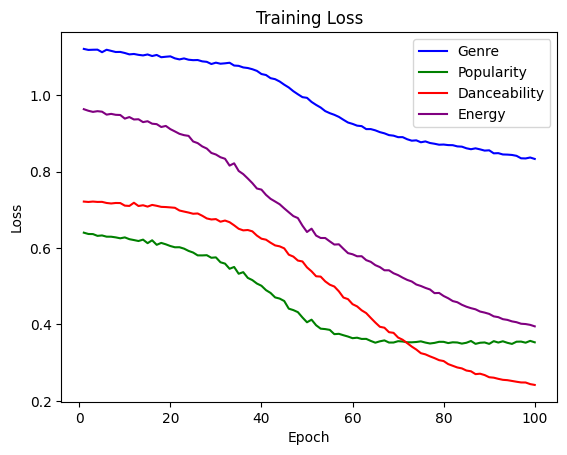

In [85]:
import matplotlib.pyplot as plt
epochs = range(1, 101)

plt.plot(epochs, losses_genre, label='Genre', color='blue')
plt.plot(epochs, losses_popularity, label='Popularity', color='green')
plt.plot(epochs, losses_danceability, label='Danceability', color='red')
plt.plot(epochs, losses_energy, label='Energy', color='purple')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Show the plot
plt.show()